In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
import matplotlib.dates as mdates

In [ ]:
df=pd.read_csv('plant_vase2.CSV')
df

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,irrgation
0,2020,3,11,14,44,39,0.59,0.63,0.51,0.45,0.01,False
1,2020,3,11,14,47,9,0.56,0.60,0.52,0.48,0.01,False
2,2020,3,11,14,49,39,0.56,0.54,0.54,0.51,0.01,False
3,2020,3,11,14,52,9,0.56,0.50,0.57,0.51,0.01,False
4,2020,3,11,14,54,39,0.57,0.53,0.58,0.51,0.01,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10284,2020,3,29,11,53,33,0.03,0.96,0.93,0.99,0.01,False
10285,2020,3,29,11,56,3,0.03,0.96,0.90,0.99,0.01,False
10286,2020,3,29,11,58,33,0.03,0.96,0.91,0.99,0.01,False
10287,2020,3,29,12,1,3,0.03,0.96,0.89,0.99,0.01,False


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df[['year','month','day','hour','minute','second']] = df[['year','month','day','hour','minute','second']].astype(str)
df.dtypes

year          object
month         object
day           object
hour          object
minute        object
second        object
moisture0    float64
moisture1    float64
moisture2    float64
moisture3    float64
moisture4    float64
irrgation       bool
dtype: object

In [ ]:
df['timestamp']=pd.to_datetime(df['year']+'-'+df['month']+'-'+df['day']+' '+df['hour']+':'+df['minute']+':'+df['second'])



In [ ]:
df['timestamp']

0       2020-03-11 14:44:39
1       2020-03-11 14:47:09
2       2020-03-11 14:49:39
3       2020-03-11 14:52:09
4       2020-03-11 14:54:39
                ...        
10284   2020-03-29 11:53:33
10285   2020-03-29 11:56:03
10286   2020-03-29 11:58:33
10287   2020-03-29 12:01:03
10288   2020-03-29 12:03:33
Name: timestamp, Length: 10289, dtype: datetime64[ns]

In [ ]:
df.drop(['year','month','day','hour','minute','second','moisture1', 'moisture2','moisture3','moisture4','irrgation'],axis=1,inplace=True)
df=df.set_index('timestamp')
df
#year 2020
#month march
#days 11-29

,moisture0
timestamp,
2020-03-11 14:44:39,0.59
2020-03-11 14:47:09,0.56
2020-03-11 14:49:39,0.56
2020-03-11 14:52:09,0.56
2020-03-11 14:54:39,0.57
...,...
2020-03-29 11:53:33,0.03
2020-03-29 11:56:03,0.03
2020-03-29 11:58:33,0.03


In [ ]:
df.dtypes

moisture0    float64
dtype: object

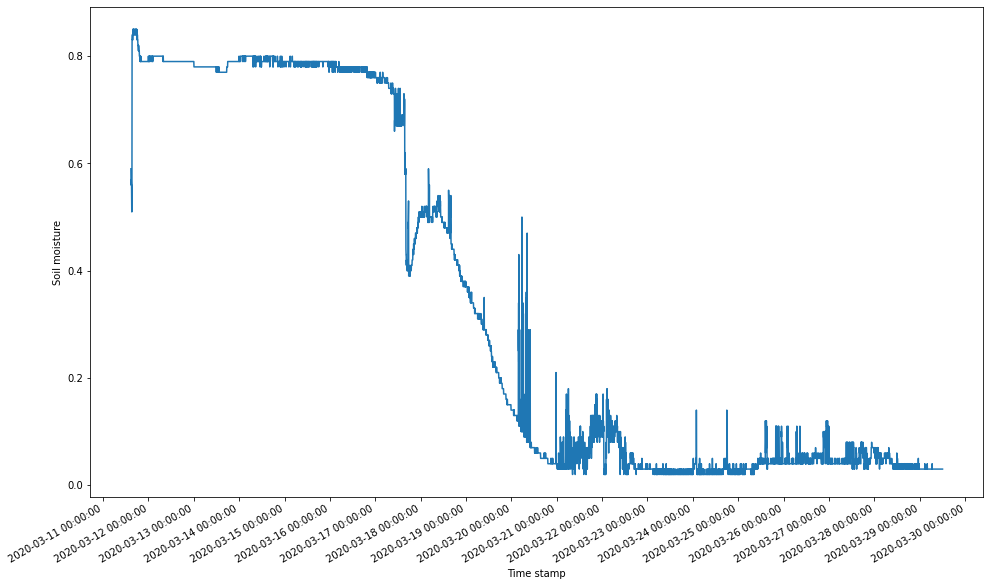

In [ ]:
plt.figure(figsize=(16,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xlabel('Time stamp')
plt.ylabel('Soil moisture')
plt.plot(df.index,df['moisture0'])
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
data=df.filter(['moisture0'])
dataset=data.values
training_data_length = math.ceil(len(dataset)*.8)
training_data_length
dataset.shape

(10289, 1)

In [ ]:
#Normalization of data - feature scaling
sc=MinMaxScaler(feature_range=(0,1))
df_scaled=sc.fit_transform(df.values)
scaled_data = pd.DataFrame(df_scaled,columns=df.columns,index=df.index)
scaled_data

,moisture0
timestamp,
2020-03-11 14:44:39,0.686747
2020-03-11 14:47:09,0.650602
2020-03-11 14:49:39,0.650602
2020-03-11 14:52:09,0.650602
2020-03-11 14:54:39,0.662651
...,...
2020-03-29 11:53:33,0.012048
2020-03-29 11:56:03,0.012048
2020-03-29 11:58:33,0.012048


In [ ]:
#create the training data set
train_data = df_scaled[0:training_data_length,:]

#splits the data into x_train and y_train
x_train=[]
y_train=[]

for i in range(1103,len(train_data)):
  x_train.append(train_data[i-1103:i,0])
  y_train.append(train_data[i,0])

In [ ]:
#convert the x and y train into numpy arrays
x_train , y_train = np.array(x_train),np.array(y_train)

In [ ]:
np.reshape(x_train, (-1, 1))

array([[0.68674699],
       [0.65060241],
       [0.65060241],
       ...,
       [0.02409639],
       [0.03614458],
       [0.02409639]])

In [ ]:
#reshape the data (lstm model accepts 3 dimensional data)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(7129, 1103, 1)

In [ ]:
#build the lstm model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=32,epochs=2)

Epoch 1/2
223/223 [==============================] - 231s 1s/step - loss: 0.0039
Epoch 2/2
223/223 [==============================] - 225s 1s/step - loss: 4.9586e-04


In [ ]:
 #create the testing dataset
#arrays contains scaled value from 4115 to 5218
test_data=df_scaled[training_data_length-1103:, :]
#create the dataset X_test and y_test
x_test=[]
y_test=dataset[training_data_length:, :]
for i in range(1103 ,len(test_data)):
  x_test.append(test_data[i-1103:i,0])

In [ ]:
#convert the data into numpy array
x_test=np.array(x_test)

In [ ]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the model's predicted price values
prediction = model.predict(x_test)
prediction = sc.inverse_transform(prediction) #unscaling the values

65/65 [==============================] - 16s 225ms/step


In [ ]:
#evaluation of model
#get the root mean squared error
rmse=np.sqrt(np.mean(prediction-y_test)**2)
rmse


0.0035259561594548484

<ipython-input-207-33f1481bb159>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=prediction


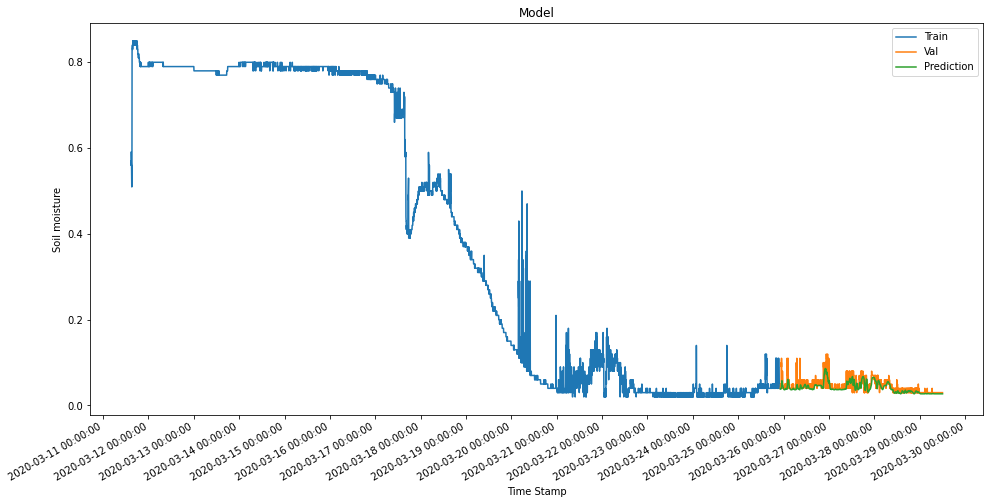

In [ ]:
#plot the data
train = df[:training_data_length]
valid = df[training_data_length:]
valid['prediction']=prediction

#visualize the data
plt.figure(figsize=(16,8))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.title('Model')
plt.xlabel('Time Stamp')
plt.ylabel('Soil moisture')
plt.plot(train['moisture0'])
plt.plot(valid[['moisture0','prediction']])
plt.legend(['Train','Val','Prediction'],loc='upper right')
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
valid.head(4)

,moisture0,prediction
timestamp,,
2020-03-25 22:18:12,0.04,0.038250
2020-03-25 22:20:42,0.04,0.038084
2020-03-25 22:23:12,0.04,0.037924
2020-03-25 22:25:42,0.05,0.037770
